# Fake training data from MNIST

We need lots of data to feed into object detection models. Here I generate this data using mnist dataset.

In [5]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np  
import cv2
from keras.datasets import mnist

from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

Using TensorFlow backend.


In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Text(0.5, 1.0, '3')

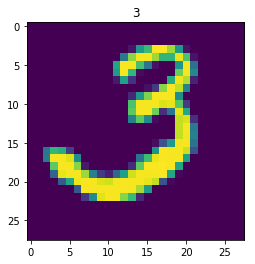

In [7]:
randcase = np.random.randint(0,2000)
plt.imshow(x_train[randcase,:,:])
plt.title(y_train[randcase])

Text(0.5, 1.0, '3')

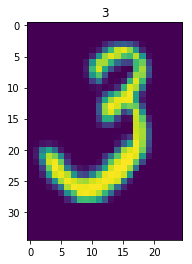

In [8]:
plt.imshow( cv2.resize(x_train[randcase,:,:],(25,35) ))
plt.title(y_train[randcase])

In [9]:
np.max(x_train[randcase,:,:]), np.min(x_train[randcase,:,:])

(255, 0)

# Generating data with noise

In [63]:
# Load noisy backgrounds:
bgs = [cv2.cvtColor(cv2.imread("output_data/fondo-con-ruido-1.jpg"), cv2.COLOR_RGB2GRAY),
       cv2.cvtColor(cv2.imread("output_data/fondo-con-ruido-2.jpg"), cv2.COLOR_RGB2GRAY),
       cv2.cvtColor(cv2.imread("output_data/fondo-con-ruido-3.jpg"), cv2.COLOR_RGB2GRAY)
      ]
bgs.append(np.min([bgs[1],bgs[2]], axis=0))
bgs.append(np.min([bgs[0],bgs[2]], axis=0))
bgs.append(np.min([bgs[0],bgs[1]], axis=0))


In [64]:
for i in range(0, len(bgs)):
    bgs[i] = cv2.resize(bgs[i], (416, 416))

In [65]:
len(bgs)

6

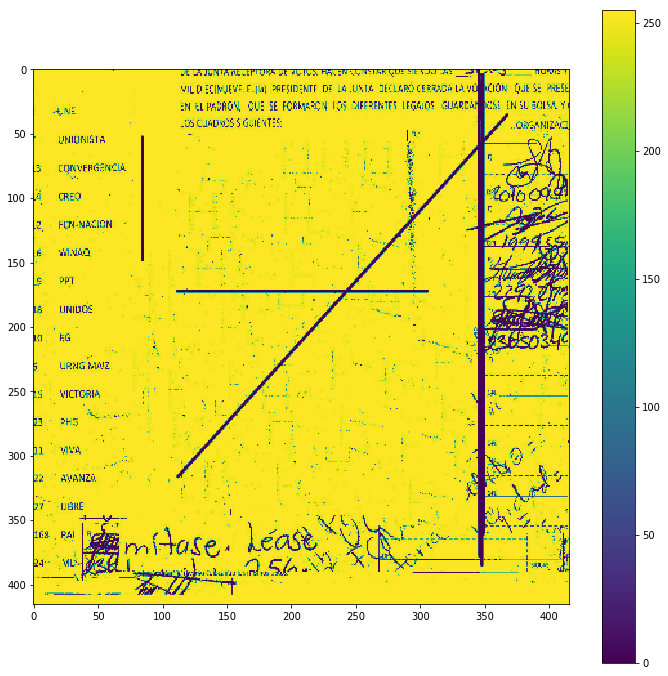

In [66]:
plt.rcParams["figure.figsize"] = (12,12)
plt.imshow(bgs[1])
plt.colorbar()

In [169]:
# Make 1000 training cases
width = 416
height= 416
ncases = 500

In [170]:
cellsize = 28
txcases = x_train.shape[0]
height2 = 200
width2 = 200
rows = int((height2 - cellsize)/cellsize)
cols = int((width2 - cellsize)/cellsize)
offsetx = 100 + np.random.randint(0,30)
offsety = 100 + np.random.randint(0,30)

In [171]:
training2 = np.zeros((ncases,width,height))

In [172]:
training2[:,:,:] = 0
training2y = []

In [173]:

for i in range(0, ncases):
    for row in range(0,rows):
        for col in range(0,cols):
            if (np.random.randint(1,10)<8):
                randcase = np.random.randint(0,txcases)
                rewidth = np.random.randint(19,32)
                reheight = np.random.randint(19,32)
                x = (offsetx + col*cellsize) 
                y = (offsety + row*cellsize)
                training2[i, y: y + reheight, x: x + rewidth] = \
                    np.max([training2[i, y: y + reheight, x: x + rewidth], 
                            cv2.resize(x_train[randcase,:,:],(rewidth, reheight) ) ], axis=(0))
                training2y.append([i, x,y,rewidth,reheight, y_train[randcase] ])
    for row in range(0,height, cellsize):
        for col in range(0,width, cellsize):
            if (row < offsety-cellsize) or (row > offsety + height2-cellsize)  or (col < offsetx-cellsize) or (col > offsetx + width2-cellsize):
                if (np.random.randint(1,10)<2):
                    training2y.append([i, col,row,cellsize,cellsize, 10 ]);
    training2[i,:,:] = np.min([255-training2[i], bgs[np.random.randint(0,len(bgs))] ], axis = 0 )

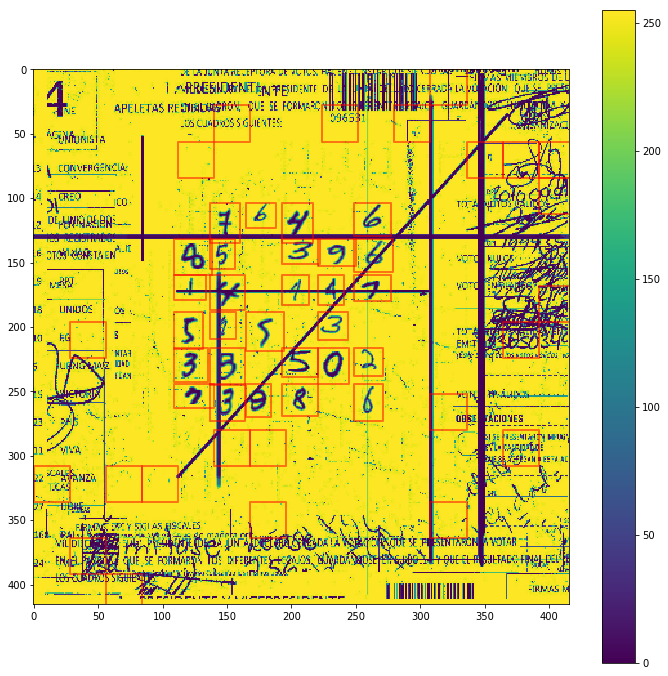

In [174]:
i = 7
plt.imshow( training2[i] )
plt.colorbar()
rects = [ Rectangle((x[1], x[2]), x[3], x[4]) for x in training2y if x[0] == i ]
ax = plt.gca()
pc = PatchCollection(rects, facecolor="None", alpha=0.5, linewidth=2,
                     edgecolor="red", )
ax.add_collection(pc)


In [175]:
training2y[i]

[0, 193, 132, 27, 23, 3]

In [176]:
np.save("output_data/train_x.npy",  training2)
np.save("output_data/train_y.npy",  training2y)

In [177]:
for i in range(0, ncases):
    cv2.imwrite("output_data/train-"+str(i)+".jpg", training2[i])

In [178]:
with open("output_data/train.txt", "w") as outputfile:
    for y in training2y:
        outputfile.write("output_data/train-" + str(y[0]) + ".jpg " + 
                         str(y[1]) + "," + str(y[2]) + "," + 
                         str(y[1]+y[3]) + "," + str(y[2]+y[4]) + "," + 
                         str(y[5]) + "\n")
with open("output_data/train.names", "w") as outputfile:
    for i in range(0,11):
        outputfile.write(str(i) + "\n")

In [179]:
# From older code
# ! cat output_data/data.txt output_data/train2.txt > output_data/data2.txt

# Test data

In [26]:
# Test cases
ncases = 250

In [30]:
tests = np.zeros((ncases,width,height))
testsy = []

In [31]:
for i in range(0, ncases):
    for row in range(0,rows):
        for col in range(0,cols):
            if (np.random.randint(1,3)==2):
                randcase = np.random.randint(0,txcases)
                rewidth = np.random.randint(15,32)
                reheight = np.random.randint(15,32)
                x = (offsetx + col*cellsize) 
                y = (offsety + row*cellsize)
                tests[i, y: y + reheight, x: x + rewidth] = \
                    np.max([tests[i, y: y + reheight, x: x + rewidth], 
                            cv2.resize(x_train[randcase,:,:],(rewidth, reheight) ) ], axis=(0))
                testsy.append([i, x,y,rewidth,reheight, y_train[randcase] ])
                
    tests[i,:,:] = 2*np.min([255-tests[i], bgs[np.random.randint(0,len(bgs))] ], axis = 0 )

In [32]:
np.save("output_data/tests_x.npy",  tests)
np.save("output_data/tests_y.npy",  testsy)

In [33]:
for i in range(0, ncases):
    cv2.imwrite("output_data/test-"+str(i)+".jpg", (tests[i]) )

In [34]:
with open("output_data/tests.txt", "w") as outputfile:
    for y in testsy:
        outputfile.write("output_data/test-" + str(y[0]) + ".jpg " + 
                         str(y[1]) + "," + str(y[2]) + "," + 
                         str(y[1]+y[3]) + "," + str(y[2]+y[4]) + "," + 
                         str(y[5]) + "\n")
with open("output_data/tests.names", "w") as outputfile:
    for i in range(0,11):
        outputfile.write(str(i) + "\n")

# Data without noise (first attempt)
## Basic Fake Data A

In [10]:
# Make 1000 training cases
width = 416
height= 416
ncases = 500

In [11]:
cellsize = 30
txcases = x_train.shape[0]
height2 = 300
width2 = 300
rows = int((height2 - cellsize)/cellsize)
cols = int((width2 - cellsize)/cellsize)

In [12]:
training2 = np.zeros((ncases,width,height))

In [13]:
training2[:,:,:] = 0
training2y = []

In [14]:

for i in range(0, ncases):
    offsetx = 20 + np.random.randint(0,100)
    offsety = 20 + np.random.randint(0,100)
    for row in range(0,rows):
        for col in range(0,cols):
            if (np.random.randint(1,10)<7):
                randcase = np.random.randint(0,txcases)
                rewidth = np.random.randint(14,40)
                reheight = rewidth
                # reheight = np.random.randint(15,32)
                x = (offsetx + col*cellsize) 
                y = (offsety + row*cellsize)
                training2[i, y: y + reheight, x: x + rewidth] = \
                    np.sum([training2[i, y: y + reheight, x: x + rewidth], 
                            cv2.resize(x_train[randcase,:,:],(rewidth, reheight) ) ], axis=(0))
                training2y.append([i, x,y,rewidth,reheight, y_train[randcase] ])
    training2[i][training2[i][:,:]>100] = 255
    training2[i,...] = cv2.blur(training2[i,...], (2,2))

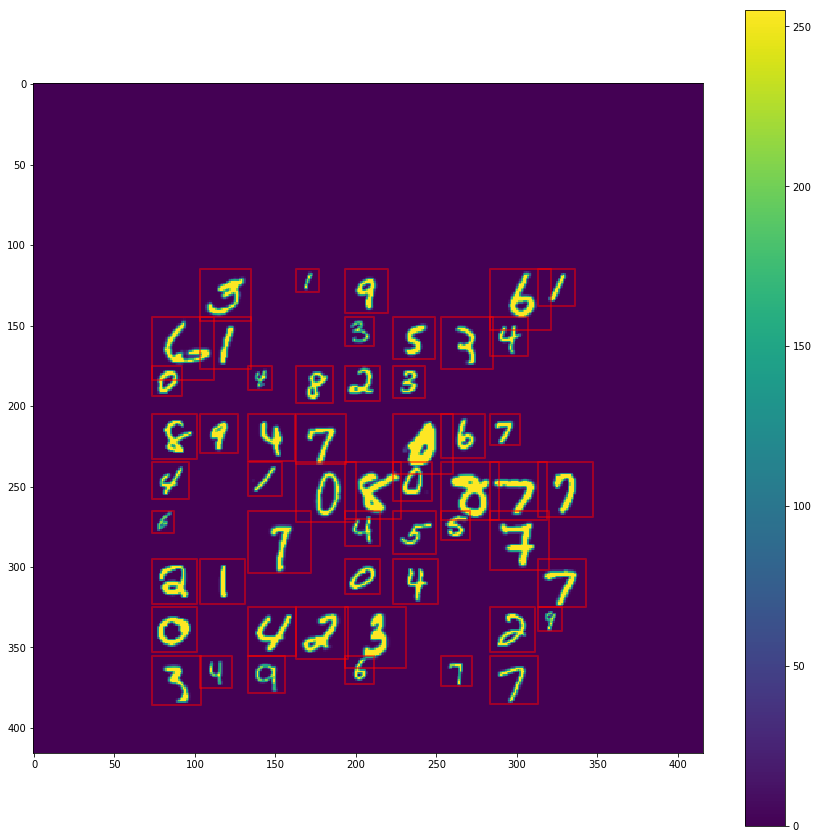

In [15]:

i = 0

plt.rcParams["figure.figsize"] = (15,15)
plt.imshow( training2[i] )
plt.colorbar()
rects = [ Rectangle((x[1], x[2]), x[3], x[4]) for x in training2y if x[0] == i ]
ax = plt.gca()
pc = PatchCollection(rects, facecolor="None", alpha=0.5, linewidth=2,
                     edgecolor="red", )
ax.add_collection(pc)


In [16]:
np.save("output_data/train_x.npy",  training2)
np.save("output_data/train_y.npy",  training2y)

In [17]:
for i in range(0, ncases):
    cv2.imwrite("output_data/train-"+str(i)+".jpg", training2[i])

In [18]:
with open("output_data/train.txt", "w") as outputfile:
    for y in training2y:
        outputfile.write("output_data/train-" + str(y[0]) + ".jpg " + 
                         str(y[1]) + "," + str(y[2]) + "," + 
                         str(y[1]+y[3]) + "," + str(y[2]+y[4]) + "," + 
                         str(y[5]) + "\n")
with open("output_data/train.names", "w") as outputfile:
    for i in range(0,11):
        outputfile.write(str(i) + "\n")

In [179]:
# From older code
# ! cat output_data/data.txt output_data/train2.txt > output_data/data2.txt

# Test data

In [120]:
# Test cases
ncases = 250

In [121]:
tests = np.zeros((ncases,width,height))
testsy = []

In [122]:
for i in range(0, ncases):
    offsetx = 20 + np.random.randint(0,100)
    offsety = 20 + np.random.randint(0,100)
    for row in range(0,rows):
        for col in range(0,cols):
            if (np.random.randint(1,10)<7):
                randcase = np.random.randint(0,txcases)
                rewidth = np.random.randint(14,40)
                reheight = rewidth
                # reheight = np.random.randint(15,32)
                x = (offsetx + col*cellsize) 
                y = (offsety + row*cellsize)
                tests[i, y: y + reheight, x: x + rewidth] = \
                    np.sum([tests[i, y: y + reheight, x: x + rewidth], 
                            cv2.resize(x_train[randcase,:,:],(rewidth, reheight) ) ], axis=(0))
                testsy.append([i, x,y,rewidth,reheight, y_train[randcase] ])
    tests[i][tests[i][:,:]>100] = 255
    tests[i,...] = cv2.blur(tests[i,...], (2,2))

In [123]:
np.save("output_data/tests_x.npy",  tests)
np.save("output_data/tests_y.npy",  testsy)

In [124]:
for i in range(0, ncases):
    cv2.imwrite("output_data/test-"+str(i)+".jpg", (tests[i]) )

In [125]:
with open("output_data/tests.txt", "w") as outputfile:
    for y in testsy:
        outputfile.write("output_data/test-" + str(y[0]) + ".jpg " + 
                         str(y[1]) + "," + str(y[2]) + "," + 
                         str(y[1]+y[3]) + "," + str(y[2]+y[4]) + "," + 
                         str(y[5]) + "\n")
with open("output_data/tests.names", "w") as outputfile:
    for i in range(0,11):
        outputfile.write(str(i) + "\n")